# Table of Contents
* [Import and clean data](#Import-and-clean-data)
    * [Step 1: Remove hashtags and mentions etc. from the texts](#Step-1:-Remove-hashtags-and-mentions-etc.-from-the-texts)
    * [Step 2: Substitute http(s) by blank string](#Step-2:-Substitute-http(s)-by-blank-string)
    * [Step 3: Expanding Contractions](#Step-3:-Expanding-Contractions)
    * [Step 4: Substitute ASCII and punctuations by blank string](#Step-4:-Substitute-ASCII-and-punctuations-by-blank-string)
    * [Step 5: Remove non English words](#Step-5:-Remove-non-English-words)
    * [Step 6: Remove stop words and lemmatize](#Step-6:-Remove-stop-words-and-lemmatize)
    * [Step 7: Add features other than texts](#Step-7:-Add-features-other-than-texts)
* [Data Visualizations](#Data-Visualizations)
* [Data Preparation](#Data-Preparation)
    * [One-hot encoding](#One-hot-encoding)
    * [Drop NaN's](#Drop-NaN's)
    * [Drop rows with blank texts](#Drop-rows-with-blank-texts)
    * [Train test split](#Train-test-split)
    * [Create 5-Fold Validation Indices](#Create-5-Fold-Validation-Indices)

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the "../data/" directory.
# Running this will list the files in the input directory
import os
print(os.listdir("../data"))
pd.options.display.max_colwidth = 200

['.DS_Store', 'data_all.csv']


## Import and clean data

In [2]:
airline_data = pd.read_csv("../data/data_all.csv", encoding = 'utf-8')
print("Full dataset shape: ", airline_data.shape)

# Only keep the following features
airline_data = airline_data[['airline_sentiment','retweet_count','text','airline']]
print("Reduced dataset shape: ", airline_data.shape)

# print some reviews
airline_data.head(10)

Full dataset shape:  (14853, 20)
Reduced dataset shape:  (14853, 4)


,airline_sentiment,retweet_count,text,airline
0,neutral,0.0,@VirginAmerica What @dhepburn said.,Virgin America
1,positive,0.0,@VirginAmerica plus you've added commercials to the experience... tacky.,Virgin America
2,neutral,0.0,@VirginAmerica I didn't today... Must mean I need to take another trip!,Virgin America
3,negative,0.0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Virgin America
4,negative,0.0,@VirginAmerica and it's a really big bad thing about it,Virgin America
5,negative,0.0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.,Virgin America
6,NaN,NaN,it's really the only bad thing about flying VA,NaN
7,positive,0.0,"@VirginAmerica yes, nearly every time I fly VX this ‰ЫПear worm‰Ыќ won‰ЫЄt go away :)",Virgin America
8,neutral,0.0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",Virgin America
9,positive,0.0,"@virginamerica Well, I didn't‰Ы_but NOW I DO! :-D",Virgin America


In [3]:
# Extract labels and text columns
labels, texts = airline_data.loc[:,'airline_sentiment'], airline_data.loc[:,'text']

In [4]:
# Ignore warning messages
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import warnings
warnings.filterwarnings("ignore")

# Remove nan text values
for i in range(len(texts)):
    if type(texts[i])==float:
        texts[i] = str(texts[i])

for i in range(len(texts)):
    if texts[i] == 'nan':
        texts[i] = ''

### Step 1: Remove hashtags and mentions etc. from the texts

In [5]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
t_nohash = []
pattern2 = r"([#@&]\w+)"
for i in range(len(texts)):
    t_nohash.append(re.sub(pattern2, '', texts[i]))
display(t_nohash[:10])

[' What  said.',
 " plus you've added commercials to the experience... tacky.",
 " I didn't today... Must mean I need to take another trip!",
 ' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces ; they have little recourse',
 " and it's a really big bad thing about it",
 " seriously would pay $30 a flight for seats that didn't have this playing.",
 "it's really the only bad thing about flying VA",
 ' yes, nearly every time I fly VX this ‰ЫПear worm‰Ыќ won‰ЫЄt go away :)',
 ' Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
 " Well, I didn't‰Ы_but NOW I DO! :-D"]

### Step 2: Substitute http(s) by blank string

In [6]:
t_nohttp = []
pattern2 = r"http:\/\/.*"
for i in range(len(t_nohash)):
    t_nohttp.append(re.sub(pattern2, '', t_nohash[i]))
display(t_nohttp[:5])

t_nohttps = []
pattern2 = r"https:\/\/.*"
for i in range(len(t_nohttp)):
    t_nohttps.append(re.sub(pattern2, '', t_nohttp[i]))
display(t_nohttps[:10])

[' What  said.',
 " plus you've added commercials to the experience... tacky.",
 " I didn't today... Must mean I need to take another trip!",
 ' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces ; they have little recourse',
 " and it's a really big bad thing about it"]

[' What  said.',
 " plus you've added commercials to the experience... tacky.",
 " I didn't today... Must mean I need to take another trip!",
 ' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces ; they have little recourse',
 " and it's a really big bad thing about it",
 " seriously would pay $30 a flight for seats that didn't have this playing.",
 "it's really the only bad thing about flying VA",
 ' yes, nearly every time I fly VX this ‰ЫПear worm‰Ыќ won‰ЫЄt go away :)',
 ' Really missed a prime opportunity for Men Without Hats parody, there. ',
 " Well, I didn't‰Ы_but NOW I DO! :-D"]

### Step 3: Expanding Contractions

In [7]:
# define common contractions - taken from the following URL
# https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [9]:
for i in range(len(t_nohttps)):
    t_nohttps[i] = expand_contractions(t_nohttps[i])
display(t_nohttps[:10])

[' What  said.',
 ' plus you have added commercials to the experience... tacky.',
 ' I did not today... Must mean I need to take another trip!',
 ' it is really aggressive to blast obnoxious "entertainment" in your guests faces ; they have little recourse',
 ' and it is a really big bad thing about it',
 ' seriously would pay $30 a flight for seats that did not have this playing.',
 'it is really the only bad thing about flying VA',
 ' yes, nearly every time I fly VX this ‰ЫПear worm‰Ыќ won‰ЫЄt go away :)',
 ' Really missed a prime opportunity for Men Without Hats parody, there. ',
 ' Well, I did not‰Ы_but NOW I DO! :-D']

### Step 4: Substitute ASCII and punctuations by blank string

In [10]:
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r' ', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts
        
texts_norm = normalize_texts(t_nohttps)
display(texts_norm[:10])

[' what  said ',
 ' plus you have added commercials to the experience    tacky ',
 ' i did not today    must mean i need to take another trip ',
 ' it is really aggressive to blast obnoxious  entertainment  in your guests faces   they have little recourse',
 ' and it is a really big bad thing about it',
 ' seriously would pay   0 a flight for seats that did not have this playing ',
 'it is really the only bad thing about flying va',
 ' yes  nearly every time i fly vx this    ear worm    won   t go away   ',
 ' really missed a prime opportunity for men without hats parody  there  ',
 ' well  i did not   but now i do    d']

### Step 5: Remove non English words

After this step, trailing and leading blanks are removed

In [11]:
#import nltk
#nltk.download('words')
import nltk
words = set(nltk.corpus.words.words())

new_text = []
for t in texts_norm:
    new_text.append(" ".join(w for w in nltk.wordpunct_tokenize(t) if w.lower() in words or w.isalpha()))
display(new_text[:10])

['what said',
 'plus you have added commercials to the experience tacky',
 'i did not today must mean i need to take another trip',
 'it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse',
 'and it is a really big bad thing about it',
 'seriously would pay a flight for seats that did not have this playing',
 'it is really the only bad thing about flying va',
 'yes nearly every time i fly vx this ear worm won t go away',
 'really missed a prime opportunity for men without hats parody there',
 'well i did not but now i do d']

### Step 6: Remove stop words and lemmatize

In [12]:
import spacy
nlp = spacy.load('en_core_web_lg')

#import nltk
#nltk.download('stopwords')

import nltk
from nltk.corpus import stopwords
eng_stop = set(stopwords.words('english'))

In [13]:
import time
start = time.process_time()

no_stops_all = []
for t in new_text:  
    doc = nlp(t)
    token_list = ''
    for token in doc:
        token = token.lemma_
        token_list = token_list + ' ' + token
    token_list = token_list.split(' ')  
    no_stops = [st for st in token_list if st not in eng_stop and st not in '-PRON-']   
    no_stops = ' '.join(no_stops)
    no_stops_all.append(no_stops)

print('completed in {} s'.format(time.process_time() - start))

completed in 291.660772 s


In [14]:
display(no_stops_all[:10])

['say',
 'plus add commercial experience tacky',
 'today must mean need take another trip',
 'really aggressive blast obnoxious entertainment guest face little recourse',
 'really big bad thing',
 'seriously would pay flight seat playing',
 'really bad thing fly va',
 'yes nearly every time fly vx ear worm win go away',
 'really miss prime opportunity man without hat parody',
 'well']

### Step 7: Add features other than texts 

In [15]:
bow_df = pd.DataFrame(no_stops_all)
bow_df.columns = ['text']
display(bow_df.head(10))

# add other columns as features
bow_df['airline_sentiment'] = airline_data['airline_sentiment']
bow_df['retweet_count'] = airline_data['retweet_count']
bow_df['airline_company'] = airline_data['airline']
print("Dataset shape: ", bow_df.shape)

,text
0,say
1,plus add commercial experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainment guest face little recourse
4,really big bad thing
5,seriously would pay flight seat playing
6,really bad thing fly va
7,yes nearly every time fly vx ear worm win go away
8,really miss prime opportunity man without hat parody
9,well


Dataset shape:  (14853, 4)


## Data Visualizations

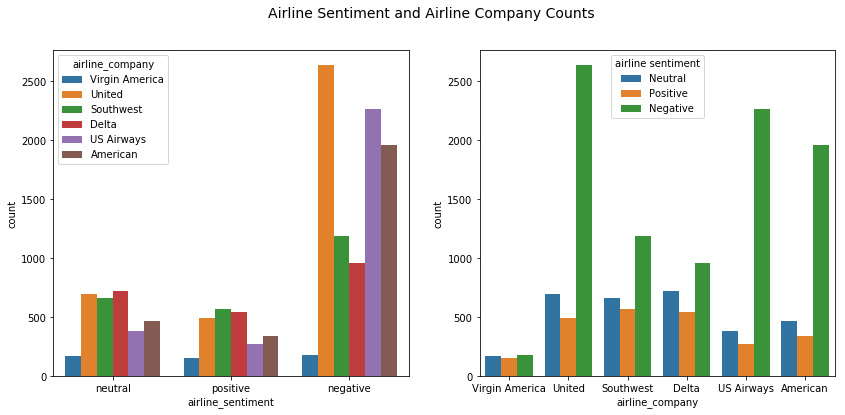

In [16]:
plt.figure(figsize=(14,6))
plt.suptitle('Airline Sentiment and Airline Company Counts', fontsize=14)

plt.subplot(121)
g1 = sns.countplot(x='airline_sentiment', data=bow_df, hue='airline_company')

plt.subplot(122)
g2 = sns.countplot(x='airline_company', data=bow_df, hue='airline_sentiment')
plt.legend(title='airline sentiment', labels=['Neutral', 'Positive','Negative'])

plt.show()

In [17]:
rc = bow_df.groupby(['airline_sentiment'])['retweet_count'].sum().to_frame().reset_index()
display(rc)

,airline_sentiment,retweet_count
0,negative,857.0
1,neutral,189.0
2,positive,164.0


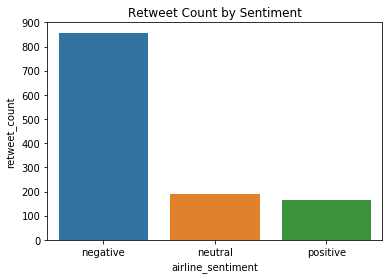

In [18]:
g = sns.barplot(x="airline_sentiment", y="retweet_count", data=rc)
g.set_title('Retweet Count by Sentiment', fontsize=12)
plt.show()

## Data Preparation

### One-hot encoding

In [19]:
# Code the three target classes as 0,1,2
ind = airline_data['airline_sentiment'] == 'neutral'
bow_df.loc[ind,'airline_sentiment'] = 0

ind = airline_data['airline_sentiment'] == 'positive'
bow_df.loc[ind,'airline_sentiment'] = 1

ind = airline_data['airline_sentiment'] == 'negative'
bow_df.loc[ind,'airline_sentiment'] = 2

# one hot encoding to convert airline company to 1/0's
bow_df = pd.get_dummies(bow_df, columns=['airline_company'])
print("Dataset shape after one-hot encoding: ", bow_df.shape)
#display(bow_df.head(10)) # There are NaN values in row 6, ...

Dataset shape after one-hot encoding:  (14853, 9)


### Assign ID to each row

To help merge dataframes later on

In [20]:
bow_df['ID'] = bow_df.index.to_list()

### Drop NaN's

In [21]:
# drop nan values
bow_df = bow_df.dropna()
print("Dataset shape after dropping NaN's: ", bow_df.shape)
#display(bow_df.head(10))

Dataset shape after dropping NaN's:  (14640, 10)


### Drop rows with blank texts

In [22]:
c = 0 # count how many rows have blank texts
ind = [] # list to keep row indices that have blank texts. 
# Note that the indices are different from the actual number of row, because we dropped some rows above already
# maximum index ends at bow_df.index.max() = 14852, but len(bow_df) = 14640
for i in range(len(bow_df)):
    if len(bow_df.text.values[i])==0:
        c = c + 1
        ind.append(i)  #bow_df.index[i]
print("Number of blank text rows: ", c)
print("Row Indices that have blank texts: ", ind)

Number of blank text rows:  89
Row Indices that have blank texts:  [340, 351, 460, 669, 781, 855, 910, 988, 1140, 1639, 1644, 1783, 1916, 2520, 2603, 2985, 3004, 3196, 3438, 3509, 3658, 3987, 4072, 4402, 4612, 4739, 4762, 4904, 4955, 5014, 5460, 5463, 5536, 5565, 5658, 5832, 6159, 6295, 6665, 6897, 6947, 7095, 7582, 7623, 8077, 8855, 8862, 8904, 9255, 9585, 10697, 10735, 10863, 10904, 11063, 11210, 11257, 11261, 11286, 11375, 11447, 11493, 11501, 11608, 11771, 11834, 11905, 11946, 11967, 12066, 12107, 12128, 12189, 12220, 12257, 12275, 12287, 12527, 12535, 12947, 13157, 13213, 13346, 14066, 14361, 14384, 14408, 14468, 14600]


In [23]:
bad_list = list(bow_df.ID.values[ind])
bow_df = bow_df.loc[~bow_df.ID.isin(bad_list),:]
print("Dataframe after dropping rows of blank texts", bow_df.shape)

Dataframe after dropping rows of blank texts (14551, 10)


### Train test split

In [24]:
from sklearn.model_selection import train_test_split

X = bow_df.drop(['airline_sentiment'], axis=1)
y = bow_df['airline_sentiment']
# The following format may be needed in modeling, otherwise errors may occur. Keep it as reference
#y = np.asarray(bow_df['airline_sentiment'], dtype="|S6") 

# train test split using test_size = 0.2 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

Save X_train_new_x, y_train_new, X_test and y_test for future model evaluations

In [25]:
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [26]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (11640, 9)
y_train shape:  (11640,)
X_test shape:  (2911, 9)
y_test shape:  (2911,)


### Create 5-Fold Validation Indices

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=123, shuffle=True)
kf.get_n_splits(X_train)

5

In [28]:
i = 1
for train_index, val_index in kf.split(X_train):
    print(f"Fold {i}: ", "Train:", train_index, "Validation:", val_index)
    i = i + 1

Fold 1:  Train: [    0     1     2 ... 11636 11638 11639] Validation: [    3     6     7 ... 11619 11620 11637]
Fold 2:  Train: [    1     3     5 ... 11637 11638 11639] Validation: [    0     2     4 ... 11591 11624 11629]
Fold 3:  Train: [    0     1     2 ... 11637 11638 11639] Validation: [    8    33    35 ... 11631 11635 11636]
Fold 4:  Train: [    0     2     3 ... 11636 11637 11638] Validation: [    1     5    18 ... 11632 11634 11639]
Fold 5:  Train: [    0     1     2 ... 11636 11637 11639] Validation: [   13    16    17 ... 11628 11633 11638]
